In [1]:
###importing lib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import imblearn 
from imblearn.under_sampling import RandomUnderSampler


In [2]:
###loading data set 
data=pd.read_csv("DS_CaseStudy_Churn_Pred_Data.csv") 
data.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,Unavailable,0,107206,7542464
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,Completed,0,123034,6044316
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,Completed,0,201136,1959290
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,12,NaN,20180113,Unavailable,0,403293,1250879
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,12,NaN,20190702,Unavailable,0,448530,884375


In [3]:
data.tail()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
9004896,10.23,20190711,20190711.0,9.95,NaN,423.55,0.0,1.0,NaN,1,1,423.55,20180205,Completed,0,73976,7088109
9004897,11.22,20190815,20190815.0,16.14,NaN,1103.80,0.0,1.0,NaN,2,1,1103.80,20190630,Completed,0,225432,8539669
9004898,NaN,20190617,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,4,NaN,20171224,Cancel By Passenger After Accept,0,262558,5546605
9004899,NaN,20190605,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,4,NaN,20190313,Cancel By Passenger After Accept,0,53340,2811519
9004900,NaN,20190820,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,6,NaN,20160310,Passenger Cancel Before Accept,0,37313,6131719


In [4]:
###extracting month from the date 
data['created_month']=data['created_date'].astype(str).str.slice(4,6)  ## mtrx['X.3'].astype(str)

In [5]:
data.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,Unavailable,0,107206,7542464,08
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,Completed,0,123034,6044316,07
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,Completed,0,201136,1959290,08
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,12,NaN,20180113,Unavailable,0,403293,1250879,07
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,12,NaN,20190702,Unavailable,0,448530,884375,07


In [6]:
data.isnull().sum()

delay                 5077799
created_date                0
pickup_date           5077799
distance              5081668
driver_rating         9004901
fare                  5081668
discount              5081668
payment_method              7
promocode             7063769
taximodelid                 0
travel_status               0
trip_fare             5081668
profile_created             0
status_description          0
pre_booked                  0
passengerid                 0
tripid                      0
created_month               0
dtype: int64

In [7]:
data[data['travel_status']==11].isnull().sum()

delay                 279
created_date            0
pickup_date           279
distance              279
driver_rating         279
fare                  279
discount              279
payment_method          0
promocode             208
taximodelid             0
travel_status           0
trip_fare             279
profile_created         0
status_description      0
pre_booked              0
passengerid             0
tripid                  0
created_month           0
dtype: int64

In [8]:
data['status_description'].unique()

array(['Unavailable', 'Completed', 'Cancel By Passenger After Accept',
       'Passenger Cancel Before Accept',
       'Driver & Dispatcher Cancellation', 'Concurrent Request',
       'Rejected'], dtype=object)

In [9]:
data['driver_rating'].unique()

array([nan])

In [143]:
###EDA 
####tatus description 
##trvlst=data.groupby(["status_description"])["tripid"].count()

data.groupby(['status_description'],as_index = False)["tripid"].count().reset_index()

,index,status_description,tripid
0,0,Cancel By Passenger After Accept,1012955
1,1,Completed,3923005
2,2,Concurrent Request,20366
3,3,Driver & Dispatcher Cancellation,85667
4,4,Passenger Cancel Before Accept,1376812
5,5,Rejected,279
6,6,Unavailable,2585817


In [ ]:
data.groupby(['status_description'],as_index = False)["tripid"].count().reset_index()

In [11]:
###Identfying churn and active customers within network 

###if customers were engaged in 6&7&8 month taken as ative ,any interaction with the pickme network
###if customers were engaged in both 6&7 month and not active in 8th month taken as churn in the next month

In [125]:
####grouping passenger id by month to extract ride count in each month

passenger=data.groupby(['passengerid','created_month'],as_index = False)["tripid"].count().pivot('passengerid','created_month').fillna(0)

In [126]:
##type(passenger)
passenger.columns = passenger.columns.droplevel(0)
passenger = passenger.reset_index().rename_axis(None, axis=1)
print(passenger)


        passengerid   06    07    08
0                 1  0.0  10.0   0.0
1                 2  3.0   2.0   2.0
2                 3  0.0   1.0   0.0
3                 4  3.0   0.0   1.0
4                 5  1.0   0.0  16.0
...             ...  ...   ...   ...
518739       528739  8.0   2.0   4.0
518740       528740  1.0   0.0   8.0
518741       528741  6.0   2.0   8.0
518742       528742  2.0   3.0   4.0
518743       528743  8.0   1.0   0.0

[518744 rows x 4 columns]


In [127]:
####labeling churn customers 

def cond_1(passenger):
    if (passenger['06']>0) and (passenger['07']> 0) and  (passenger['08']<= 0) :  ##April drop to 5, 
        return 1
    elif (passenger['06']> 0) and (passenger['07']>0) and (passenger['08']> 0):
        return 0
    else:
        return 2    


In [128]:
passenger['churn'] = passenger.apply(cond_1, axis=1)

In [129]:
passenger.head()

,passengerid,06,07,08,churn
0,1,0.0,10.0,0.0,2
1,2,3.0,2.0,2.0,0
2,3,0.0,1.0,0.0,2
3,4,3.0,0.0,1.0,2
4,5,1.0,0.0,16.0,2


In [131]:
####passenger total information
passenger_ttl=passenger.copy()


In [147]:
passenger_ttl.head()

,passengerid,06,07,08,churn,june,july,Aug,intract
0,1,0.0,10.0,0.0,2,0,1,0,1
1,2,3.0,2.0,2.0,0,1,1,1,3
2,3,0.0,1.0,0.0,2,0,1,0,1
3,4,3.0,0.0,1.0,2,1,0,1,2
4,5,1.0,0.0,16.0,2,1,0,1,2


In [146]:
passenger_ttl.to_csv('passenger_ttl.csv', header=True) 

In [148]:
### 
data1=data.merge(passenger_ttl, on='passengerid', how='left')

In [149]:
data1.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,...,profile_created_year_month,AON,06,07,08,churn,june,july,Aug,intract
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,...,2,29,21.0,111.0,20.0,0,1,1,1,3
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,...,2,17,29.0,18.0,5.0,0,1,1,1,3
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,...,9,10,45.0,11.0,54.0,0,1,1,1,3
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,...,1,18,6.0,35.0,6.0,0,1,1,1,3
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,...,7,0,0.0,7.0,17.0,2,0,1,1,2


In [154]:
data1.groupby(['status_description','churn'],as_index = False)["tripid"].count().pivot('status_description','churn').fillna(0)

tripid                
churn                                   0       1       2
status_description                                       
Cancel By Passenger After Accept   753373   64519  195063
Completed                         2995273  219127  708605
Concurrent Request                  15766     541    4059
Driver & Dispatcher Cancellation    58063    5604   22000
Passenger Cancel Before Accept     999788   91175  285849
Rejected                              216      16      47
Unavailable                       2013945  137445  434427

In [133]:
passenger= passenger[passenger['churn']!=2]

In [135]:
def cond_2(passenger_ttl):
    if (passenger_ttl['06']>0) :  ##April drop to 5, 
        return 3
    else:
        return 0
    
def cond_3(passenger_ttl):
    if (passenger_ttl['07']>0) :  ##April drop to 5, 
        return 1
    else:
        return 0
    
def cond_4(passenger_ttl):
    if (passenger_ttl['08']>0) :  ##April drop to 5, 
        return 1
    else:
        return 0    

In [136]:
passenger_ttl['june'] = passenger_ttl.apply(cond_2, axis=1)
passenger_ttl['july'] = passenger_ttl.apply(cond_3, axis=1)
passenger_ttl['Aug'] = passenger_ttl.apply(cond_4, axis=1)

In [137]:
passenger_ttl['intract']=passenger_ttl['june']+passenger_ttl['july']+passenger_ttl['Aug']

In [138]:
passenger_ttl.head()

,passengerid,06,07,08,churn,june,july,Aug,intract
0,1,0.0,10.0,0.0,2,0,1,0,1
1,2,3.0,2.0,2.0,0,1,1,1,3
2,3,0.0,1.0,0.0,2,0,1,0,1
3,4,3.0,0.0,1.0,2,1,0,1,2
4,5,1.0,0.0,16.0,2,1,0,1,2


In [139]:
passenger_ttl.groupby(['intract'],as_index = False)["passengerid"].count().reset_index()

,index,intract,passengerid
0,0,1,227827
1,1,2,123052
2,2,3,167865


In [19]:
passenger[passenger['passengerid']==20]

,passengerid,06,07,08,churn


In [20]:
passenger_data=passenger[['passengerid','churn']]

In [21]:
passenger_data[passenger_data['passengerid']==20]

,passengerid,churn


In [22]:
passenger_data.head()

,passengerid,churn
1,2,0
6,7,0
8,9,1
11,12,0
14,15,0


In [23]:
passenger[passenger['churn']==1]

,passengerid,06,07,08,churn
8,9,1.0,3.0,0.0,1
21,22,1.0,4.0,0.0,1
32,34,1.0,2.0,0.0,1
41,43,2.0,1.0,0.0,1
73,75,17.0,4.0,0.0,1
...,...,...,...,...,...
518718,528718,1.0,1.0,0.0,1
518721,528721,8.0,19.0,0.0,1
518725,528725,1.0,8.0,0.0,1
518736,528736,5.0,6.0,0.0,1


In [24]:
data[data['passengerid']==20]

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month
731249,NaN,20190819,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,12,NaN,20180708,Unavailable,0,20,7701713,08
1354706,NaN,20190819,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,12,NaN,20180708,Unavailable,0,20,2995070,08
1836051,NaN,20190820,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,12,NaN,20180708,Unavailable,0,20,691012,08
2392859,NaN,20190820,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,12,NaN,20180708,Unavailable,0,20,733707,08
4618503,NaN,20190820,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,12,NaN,20180708,Unavailable,0,20,1901252,08
7928922,NaN,20190819,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,4,NaN,20180708,Cancel By Passenger After Accept,0,20,8573685,08


In [ ]:
###Feture engineering based on 6th and 7th month

In [25]:
junejuly=data[data['created_month']!='08']  

In [26]:
junejuly.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.00,1.0,NaN,1,1,676.13,20180201,Completed,0,123034,6044316,07
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,12,NaN,20180113,Unavailable,0,403293,1250879,07
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,12,NaN,20190702,Unavailable,0,448530,884375,07
6,20.27,20190619,20190619.0,57.34,NaN,2606.82,2606.82,1.0,dcpcm,4,1,0.00,20190105,Completed,0,219991,3532976,06
8,0.93,20190624,20190624.0,9.68,NaN,423.91,0.00,1.0,NaN,1,1,423.91,20170203,Completed,0,16041,8903870,06


In [ ]:
### Travel status 

In [28]:
travel_status=junejuly.groupby(['passengerid','travel_status'],as_index = False)["tripid"].count().pivot('passengerid','travel_status').fillna(0)

In [29]:
travel_status.columns = travel_status.columns.droplevel(0)
travel_status = travel_status.reset_index().rename_axis(None, axis=1)
print(travel_status)

        passengerid    1    4    6    8   11   12   13
0                 1  0.0  0.0  1.0  0.0  0.0  9.0  0.0
1                 2  3.0  1.0  1.0  0.0  0.0  0.0  0.0
2                 3  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3                 4  2.0  0.0  1.0  0.0  0.0  0.0  0.0
4                 5  1.0  0.0  0.0  0.0  0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...  ...
428956       528739  3.0  0.0  3.0  1.0  0.0  3.0  0.0
428957       528740  1.0  0.0  0.0  0.0  0.0  0.0  0.0
428958       528741  3.0  2.0  1.0  0.0  0.0  2.0  0.0
428959       528742  5.0  0.0  0.0  0.0  0.0  0.0  0.0
428960       528743  4.0  3.0  2.0  0.0  0.0  0.0  0.0

[428961 rows x 8 columns]


In [30]:
travel_status.head()

,passengerid,1,4,6,8,11,12,13
0,1,0.0,0.0,1.0,0.0,0.0,9.0,0.0
1,2,3.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,2.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
travel_status_data=travel_status[['passengerid',1,4,6,8,11,12,13]]

##travel_status_data.head()

In [ ]:
##total trip fare 

In [32]:
amount=junejuly.groupby(['passengerid'],as_index = False)["trip_fare"].sum().reset_index()

In [33]:
amount


,index,passengerid,trip_fare
0,0,1,0.00
1,1,2,661.35
2,2,3,0.00
3,3,4,306.36
4,4,5,471.85
...,...,...,...
428956,428956,528739,301.38
428957,428957,528740,335.86
428958,428958,528741,65.99
428959,428959,528742,1652.52


In [34]:
net_amount_data=amount[['passengerid','trip_fare']]

In [35]:
###Age on network ###should be extract from full data set 

In [36]:
data['profile_created_year']=data['profile_created'].astype(str).str.slice(0,4).astype(int)   ## mtrx['X.3'].astype(str)

In [37]:
data['profile_created_year_month']=data['profile_created'].astype(str).str.slice(4,6).astype(int)   

In [38]:
data.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month,profile_created_year,profile_created_year_month
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,Unavailable,0,107206,7542464,08,2017,2
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,Completed,0,123034,6044316,07,2018,2
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,Completed,0,201136,1959290,08,2018,9
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,12,NaN,20180113,Unavailable,0,403293,1250879,07,2018,1
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,12,NaN,20190702,Unavailable,0,448530,884375,07,2019,7


In [39]:
data['AON']=(2019-data['profile_created_year'])*12+ (7-data['profile_created_year_month'])

In [40]:
data.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,...,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month,profile_created_year,profile_created_year_month,AON
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,...,NaN,20170223,Unavailable,0,107206,7542464,08,2017,2,29
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,...,676.13,20180201,Completed,0,123034,6044316,07,2018,2,17
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,...,836.63,20180905,Completed,0,201136,1959290,08,2018,9,10
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,...,NaN,20180113,Unavailable,0,403293,1250879,07,2018,1,18
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,...,NaN,20190702,Unavailable,0,448530,884375,07,2019,7,0


In [41]:
junejuly.tail()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month
9004893,3.27,20190714,20190714.0,1.90,NaN,94.01,37.6,1.0,WCFIN,1,1,56.40,20160409,Completed,0,464966,647904,07
9004895,6.22,20190602,20190602.0,2.22,NaN,105.94,0.0,1.0,NaN,1,1,105.94,20181108,Completed,0,280002,5928699,06
9004896,10.23,20190711,20190711.0,9.95,NaN,423.55,0.0,1.0,NaN,1,1,423.55,20180205,Completed,0,73976,7088109,07
9004898,NaN,20190617,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,4,NaN,20171224,Cancel By Passenger After Accept,0,262558,5546605,06
9004899,NaN,20190605,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,4,NaN,20190313,Cancel By Passenger After Accept,0,53340,2811519,06


In [42]:
aon_data=data[['passengerid','AON']].drop_duplicates()


In [43]:
aon_data[aon_data['passengerid']==20]

,passengerid,AON
731249,20,12


In [44]:
#junejuly[junejuly['passengerid']==464966]

In [222]:
###discount amount

In [45]:

discount_amount=junejuly.groupby(['passengerid'],as_index = False)["discount"].sum().reset_index()

In [46]:
discount_amount.head()

,index,passengerid,discount
0,0,1,0.0
1,1,2,0.0
2,2,3,0.0
3,3,4,200.0
4,4,5,0.0


In [47]:
discount_amount[discount_amount['passengerid']==262558]  

,index,passengerid,discount
213062,213062,262558,0.0


In [48]:
discount_amount_data=discount_amount[['passengerid','discount']]

In [49]:
discount_amount_data.head()


,passengerid,discount
0,1,0.0
1,2,0.0
2,3,0.0
3,4,200.0
4,5,0.0


In [50]:
###Distances 

In [51]:
avg_distance=junejuly.groupby(['passengerid'],as_index = False)["distance"].mean().fillna(0).reset_index()

In [52]:
avg_distance.head()

,index,passengerid,distance
0,0,1,0.00
1,1,2,5.47
2,2,3,0.00
3,3,4,6.13
4,4,5,12.44


In [53]:
avg_distance_data=avg_distance[['passengerid','distance']]


### Total delay time 

In [177]:
avg_delay=junejuly.groupby(['passengerid'],as_index = False)["delay"].sum().fillna(0).reset_index()

In [178]:
avg_delay.head()

,index,passengerid,delay
0,0,1,0.00
1,1,2,14.72
2,2,3,0.00
3,3,4,17.63
4,4,5,6.45


In [179]:
total_delay_data=avg_delay[['passengerid','delay']]
total_delay_data.head()


,passengerid,delay
0,1,0.00
1,2,14.72
2,3,0.00
3,4,17.63
4,5,6.45


In [57]:
#### Payment method  

###identfying cash and card customers 
###extract the most common payment method aginst the passenger ID

In [58]:
junejuly["payment_method"].unique()

array([1., 2., 3., 5., 7.])

In [59]:
junejuly[junejuly["payment_method"]==3]

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid,created_month
224,NaN,20190726,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1,12,NaN,20190614,Unavailable,0,365207,5341758,07
370,NaN,20190708,NaN,NaN,NaN,NaN,NaN,3.0,AVG56,1,4,NaN,20181106,Cancel By Passenger After Accept,0,453339,8145562,07
1670,8.12,20190615,20190615.0,1.04,NaN,65.01,0.0,3.0,NaN,1,1,65.01,20190615,Completed,0,82519,1169354,06
2024,NaN,20190727,NaN,NaN,NaN,NaN,NaN,3.0,pickme20,1,12,NaN,20190702,Unavailable,0,125520,7115336,07
2526,3.02,20190722,20190722.0,5.28,NaN,327.79,0.0,3.0,NaN,1,1,327.79,20171221,Completed,0,107885,2760392,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000731,NaN,20190729,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1,12,NaN,20190601,Unavailable,0,238265,8312765,07
9001411,4.07,20190608,20190608.0,2.14,NaN,104.40,0.0,3.0,NaN,1,1,104.40,20190505,Completed,0,104691,6761286,06
9003836,NaN,20190716,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1,12,NaN,20190617,Unavailable,0,516029,2146270,07
9004068,16.95,20190714,20190714.0,0.67,NaN,60.54,0.0,3.0,NaN,1,1,60.54,20171108,Completed,0,211551,857539,07


In [60]:
payment_method=junejuly.groupby(['passengerid'])['payment_method'].agg(
    lambda x: pd.Series.mode(x)[0]).reset_index()

In [61]:
payment_method.head()


,passengerid,payment_method
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [62]:
payment_method_data=payment_method[['passengerid','payment_method']]

In [63]:
payment_method_data.head()


,passengerid,payment_method
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [64]:
payment_method[payment_method['passengerid']==453339]

,passengerid,payment_method
368024,453339,3.0


In [65]:
junejuly['driver_rating'].unique()

array([nan])

In [ ]:
###creating Passenger data set

In [66]:
passenger_data.head()
#travel_status_data.head()
#aon_data
#discount_amount_data
#avg_distance_data
#avg_delay_data.head()
#payment_method_data

,passengerid,churn
1,2,0
6,7,0
8,9,1
11,12,0
14,15,0


In [67]:
passenger_data['passengerid'].max()    ##1-528,743

528743

In [68]:
payment_method_data['passengerid'].max()

528743

In [ ]:
####Joinin data sets 


In [180]:
d1=passenger_data.merge(aon_data, on='passengerid', how='left')

In [181]:
d2=d1.merge(travel_status_data, on='passengerid', how='left')
d3=d2.merge(discount_amount_data, on='passengerid', how='left')
d4=d3.merge(avg_distance_data, on='passengerid', how='left')


In [71]:
d4.head()

,passengerid,churn,AON,1,4,6,8,11,12,13,discount,distance
0,2,0,18,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.470000
1,7,0,22,52.0,5.0,3.0,1.0,0.0,2.0,0.0,0.0,5.388462
2,9,1,19,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.400000
3,12,0,1,11.0,0.0,2.0,1.0,0.0,0.0,0.0,650.0,4.800000
4,15,0,11,28.0,8.0,7.0,0.0,0.0,74.0,1.0,0.0,3.925357


In [182]:
d4['passengerid'].size

211324

In [183]:
d4['passengerid'].nunique()

211324

In [184]:
d4['passengerid'].max()

528743

In [185]:
d5=d4.merge(total_delay_data, on='passengerid', how='left')
d6=d5.merge(payment_method_data, on='passengerid', how='left')

In [186]:
d6.head()

,passengerid,churn,AON,1,4,6,8,11,12,13,discount,distance,delay,payment_method
0,2,0,18,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.470000,14.72,1.0
1,7,0,22,52.0,5.0,3.0,1.0,0.0,2.0,0.0,0.0,5.388462,486.82,1.0
2,9,1,19,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.400000,8.45,1.0
3,12,0,1,11.0,0.0,2.0,1.0,0.0,0.0,0.0,650.0,4.800000,86.51,1.0
4,15,0,11,28.0,8.0,7.0,0.0,0.0,74.0,1.0,0.0,3.925357,204.93,1.0


In [187]:
d7=d6.merge(net_amount_data, on='passengerid', how='left')


In [188]:
d7.head()

,passengerid,churn,AON,1,4,6,8,11,12,13,discount,distance,delay,payment_method,trip_fare
0,2,0,18,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.470000,14.72,1.0,661.35
1,7,0,22,52.0,5.0,3.0,1.0,0.0,2.0,0.0,0.0,5.388462,486.82,1.0,12725.76
2,9,1,19,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.400000,8.45,1.0,293.84
3,12,0,1,11.0,0.0,2.0,1.0,0.0,0.0,0.0,650.0,4.800000,86.51,1.0,1855.06
4,15,0,11,28.0,8.0,7.0,0.0,0.0,74.0,1.0,0.0,3.925357,204.93,1.0,5566.22


In [189]:
print(d7.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211324 entries, 0 to 211323
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   passengerid     211324 non-null  int64  
 1   churn           211324 non-null  int64  
 2   AON             211324 non-null  int32  
 3   1               211324 non-null  float64
 4   4               211324 non-null  float64
 5   6               211324 non-null  float64
 6   8               211324 non-null  float64
 7   11              211324 non-null  float64
 8   12              211324 non-null  float64
 9   13              211324 non-null  float64
 10  discount        211324 non-null  float64
 11  distance        211324 non-null  float64
 12  delay           211324 non-null  float64
 13  payment_method  211324 non-null  float64
 14  trip_fare       211324 non-null  float64
dtypes: float64(12), int32(1), int64(2)
memory usage: 25.0 MB
None


In [190]:
d7.describe()

,passengerid,churn,AON,1,4,6,8,11,12,13,discount,distance,delay,payment_method,trip_fare
count,211324.000000,211324.000000,211324.000000,211324.000000,211324.000000,211324.000000,211324.000000,211324.000000,211324.000000,211324.000000,2.113240e+05,211324.000000,211324.000000,211324.000000,2.113240e+05
mean,263944.465962,0.205651,16.108871,10.966066,2.797671,3.446636,0.213795,0.000823,8.079759,0.027872,6.671675e+02,8.083687,83.938723,1.043814,4.801192e+04
std,152602.855055,0.404178,13.877494,13.905397,5.022216,10.066097,2.030063,0.028847,25.812474,0.201519,5.462838e+03,8.304602,166.052151,0.209390,5.055701e+06
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-36991.660000,1.000000,0.000000e+00
25%,131597.500000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.970000,22.320000,1.000000,6.685875e+02
50%,263905.500000,0.000000,13.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.410000,47.300000,1.000000,1.682150e+03
75%,395937.750000,0.000000,27.000000,13.000000,3.000000,4.000000,0.000000,0.000000,6.000000,0.000000,2.000000e+02,10.010000,98.030000,1.000000,3.934980e+03
max,528743.000000,1.000000,50.000000,637.000000,295.000000,967.000000,697.000000,2.000000,1347.000000,12.000000,1.034705e+06,1905.915000,18141.560000,7.000000,7.754723e+08


In [191]:
d7["churn"].value_counts()

0    167865
1     43459
Name: churn, dtype: int64

In [192]:
d7.head()

,passengerid,churn,AON,1,4,6,8,11,12,13,discount,distance,delay,payment_method,trip_fare
0,2,0,18,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.470000,14.72,1.0,661.35
1,7,0,22,52.0,5.0,3.0,1.0,0.0,2.0,0.0,0.0,5.388462,486.82,1.0,12725.76
2,9,1,19,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.400000,8.45,1.0,293.84
3,12,0,1,11.0,0.0,2.0,1.0,0.0,0.0,0.0,650.0,4.800000,86.51,1.0,1855.06
4,15,0,11,28.0,8.0,7.0,0.0,0.0,74.0,1.0,0.0,3.925357,204.93,1.0,5566.22


In [210]:
print(d7.shape)

(211324, 15)


In [214]:
print(d7[d7["churn"] == 1]["AON"].mean())
print(d7[d7["churn"] == 1]["discount"].mean())
print(d7[d7["churn"] == 1][1].mean())
print(d7[d7["churn"] == 1]['distance'].mean())
print(d7[d7["churn"] == 1]['delay'].mean())
print(d7[d7["churn"] == 1]['trip_fare'].mean())

14.130237695299018
289.47193860880395
5.042154674520813
8.76021067776401
40.6548836834718
2280.486322280755


In [215]:
print(d7[d7["churn"] == 0]["AON"].mean())
print(d7[d7["churn"] == 0]["discount"].mean())
print(d7[d7["churn"] == 0][1].mean())
print(d7[d7["churn"] == 0]['distance'].mean())
print(d7[d7["churn"] == 0]['delay'].mean())
print(d7[d7["churn"] == 0]['trip_fare'].mean())

16.621124117594494
764.9501065141854
12.499722991689751
7.90854001984292
95.14458713847233
59851.45192720399


In [193]:
d7.isnull().sum()

passengerid       0
churn             0
AON               0
1                 0
4                 0
6                 0
8                 0
11                0
12                0
13                0
discount          0
distance          0
delay             0
payment_method    0
trip_fare         0
dtype: int64

In [194]:
#selecting explanatory variables and predictor variable
X = d7[['AON',1,4,6,8,11,
                        13,'discount','distance','delay','payment_method','trip_fare']]
y = d7[['churn']]

In [195]:
X.head()

,AON,1,4,6,8,11,13,discount,distance,delay,payment_method,trip_fare
0,18,3.0,1.0,1.0,0.0,0.0,0.0,0.0,5.470000,14.72,1.0,661.35
1,22,52.0,5.0,3.0,1.0,0.0,0.0,0.0,5.388462,486.82,1.0,12725.76
2,19,2.0,1.0,0.0,1.0,0.0,0.0,0.0,3.400000,8.45,1.0,293.84
3,1,11.0,0.0,2.0,1.0,0.0,0.0,650.0,4.800000,86.51,1.0,1855.06
4,11,28.0,8.0,7.0,0.0,0.0,1.0,0.0,3.925357,204.93,1.0,5566.22


In [196]:
#y.head()
y["churn"].value_counts()

0    167865
1     43459
Name: churn, dtype: int64

In [197]:
#### Train and test data split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [198]:
##y["churn"].value_counts()
print(y_train)

        churn
14101       0
105473      0
119785      1
19776       0
156695      0
...       ...
100947      0
86821       0
45180       0
4445        0
65709       0

[147926 rows x 1 columns]


In [199]:
y_train["churn"].value_counts()

0    117505
1     30421
Name: churn, dtype: int64

In [200]:
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 
  
print (X_train[0:10, :]) 

[[ 0.93003902  2.86134457  1.6207197   0.05400804 -0.09298105 -0.02837435
  -0.13863376 -0.09939776 -0.30974905  1.30886515 -0.20778129 -0.00726166]
 [ 1.00209657  1.14506544 -0.15804743  0.95067383 -0.09298105 -0.02837435
  -0.13863376 -0.05550215 -0.92003757  0.52348641 -0.20778129 -0.00970326]
 [ 0.78592393 -0.3566788  -0.55332902 -0.3445101  -0.09298105 -0.02837435
  -0.13863376 -0.116956   -0.30670098 -0.20508244 -0.20778129 -0.00974592]
 [ 1.79472958 -0.57121369 -0.35568823 -0.24488056 -0.09298105 -0.02837435
  -0.13863376 -0.116956    1.09650896 -0.27229729 -0.20778129 -0.00963537]
 [ 2.01090222  2.14622827 -0.55332902  0.45252617 -0.09298105 -0.02837435
  -0.13863376 -0.10817688 -0.74388092  1.00506296 -0.20778129 -0.00864148]
 [-0.7993421  -0.07063227  0.03959336 -0.3445101  -0.09298105 -0.02837435
  -0.13863376 -0.02916478 -0.91865066 -0.37133903 -0.20778129 -0.01000464]
 [-0.51111192 -0.42819043 -0.15804743 -0.24488056  0.33688157 -0.02837435
  -0.13863376 -0.10882478  0.049

In [201]:
#  random undersampler
import imblearn 
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(sampling_strategy=1) 
#rus_2 = RandomUnderSampler(sampling_strategy=0.11) 
from collections import Counter

# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train,y_train)
#X_rus4, y_rus4 = rus_2.fit_resample(X_train,y_train)

# new class distribution
#print(Counter(y_rus))

In [202]:
print(Counter(y_rus))

Counter({'churn': 1})


In [203]:
##print(y_rus)
y_rus["churn"].value_counts()

1    30421
0    30421
Name: churn, dtype: int64

In [206]:
## classification model implementation 

from sklearn.ensemble import GradientBoostingClassifier
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=0)
gb = GradientBoostingClassifier()

In [205]:
#Training 

gb_1=gb.fit(X_rus, y_rus)

##########prediction on test data
predictions_1 = gb_1.predict(X_test)#sampling strtagy=0.11

C:\Users\harini_105373\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


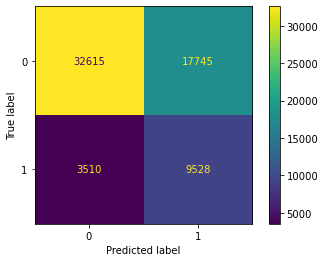

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions_1)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [209]:
from sklearn.metrics import classification_report

print('Classification report')
print(classification_report(y_test, predictions_1, target_names=['0', '1'],digits=4))

Classification report
              precision    recall  f1-score   support

           0     0.9028    0.6476    0.7542     50360
           1     0.3494    0.7308    0.4727     13038

    accuracy                         0.6647     63398
   macro avg     0.6261    0.6892    0.6135     63398
weighted avg     0.7890    0.6647    0.6963     63398



In [ ]:
####Logistic regression

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


logisticRegr = LogisticRegression()

In [218]:
logisticRegr_1=logisticRegr.fit(X_rus, y_rus)

C:\Users\harini_105373\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [219]:
predictions_2 = logisticRegr_1.predict(X_test)

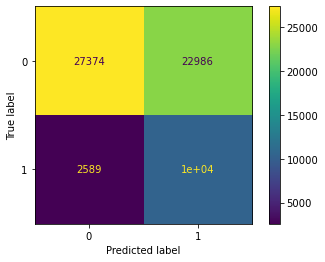

In [220]:
cm2 = confusion_matrix(y_test,predictions_2)
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=['0','1'])
cmd2.plot()

In [221]:
print(classification_report(y_test, predictions_2, target_names=['1', '0'],digits=4))

              precision    recall  f1-score   support

           1     0.9136    0.5436    0.6816     50360
           0     0.3125    0.8014    0.4497     13038

    accuracy                         0.5966     63398
   macro avg     0.6131    0.6725    0.5656     63398
weighted avg     0.7900    0.5966    0.6339     63398

